In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
#import chart_studio
#import chart_studio.plotly as py
#import plotly.graph_objects as go
import sklearn
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [4]:
#reading data files
store_df=pd.read_csv("store.csv")
train_df=pd.read_csv("train.csv",parse_dates = True, index_col = 'Date')

In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


## Dealing with missing values

In [7]:
#Count missing values in store dataset
print("Store Dataset:\n\n",store_df.isnull().sum())

Store Dataset:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [8]:
#Count missing values in train dataset
print("Train Dataset:\n\n",train_df.isnull().sum())

Train Dataset:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [9]:
#we can see that some features have a high percentage of missing values and they won't be accurate as indicators, 
#so we will remove features with more than 30% missing values.
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

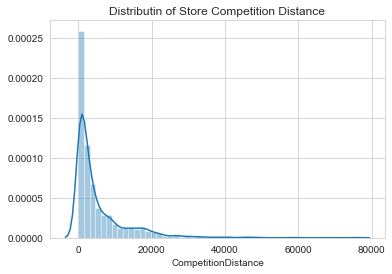

In [10]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

## The distribution is right skewed, so we'll replace missing values with the median.

In [11]:
# replace missing values in CompetitionDistance with median for the store dataset
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

## Data Extraction

In [12]:
# extract year, month, day and week of year from "Date"
train_df["Year"]=train_df.index.year
train_df["Month"]=train_df.index.month
train_df["Day"]=train_df.index.day
train_df["WeekOfYear"]=train_df.index.week
train_df= train_df.reset_index()

In [13]:
train_df

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,1
1017205,2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,1
1017206,2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,1
1017207,2013-01-01,1114,2,0,0,0,0,a,1,2013,1,1,1


## Join tables 

In [14]:
df = pd.merge(train_df, store_df, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [15]:
len(df)

1017209

## Drop subsets of data which might cause Bias

In [16]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [17]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [18]:
# see if there's any opened store with zero sales
print("Number of stores with zero sales:",df[df.Sales == 0].shape[0])

Number of stores with zero sales: 54


In [19]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [20]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0


## Handling Categorical Data

In [21]:
#The column StateHoliday contains 0,'0',a and b. This needs to be conerted to a pure numerical data column
df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [22]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [23]:
set(df.StateHoliday)

{'0', 'a', 'b', 'c'}

In [24]:
# 0 - not a state holiday; 1- is on a state holiday
df['StateHoliday'] = df.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [25]:
set(df.StateHoliday)

{0, 1}

## Adding additional features

In [26]:
df1 = df.copy()

In [27]:
#create a variable that calculates monthly sales for each store.

In [28]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [29]:
sales

,Year,Month,Store,AvgSales
0,2013,1,1,4939.653846
1,2013,1,2,4429.653846
2,2013,1,3,6371.269231
3,2013,1,4,9027.423077
4,2013,1,5,4209.307692
...,...,...,...,...
33460,2015,7,1111,4509.703704
33461,2015,7,1112,8395.259259
33462,2015,7,1113,6707.814815
33463,2015,7,1114,23206.962963


In [30]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

df1.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0,201571
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1,201572
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1,201573
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0,201574
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0,201575


In [31]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)

# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

In [32]:
df1.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,AvgSales
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0,201571,4491.333333
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1,201572,4954.259259
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1,201573,6797.592593
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0,201574,10256.851852
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0,201575,4599.629630


In [33]:
#create a variable that calculates Monthly average number of customers for each store.

In [34]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [35]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [36]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)
# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [37]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

In [38]:
df1.head()

,Date,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,AvgSales,cust_key,AvgCustomer
0,2015-07-31,1,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,201571,4491.333333,201571,519.407407
1,2015-07-31,2,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,201572,4954.259259,201572,621.222222
2,2015-07-31,3,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,201573,6797.592593,201573,682.888889
3,2015-07-31,4,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,201574,10256.851852,201574,1294.259259
4,2015-07-31,5,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,201575,4599.629630,201575,521.703704


In [39]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

In [40]:
df1.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704


## Exploratory data analysis 

## 1. Correlation Heatmap

In [40]:
corr = df1.corr()

Text(0.5, 1, 'Correlation Heatmap')

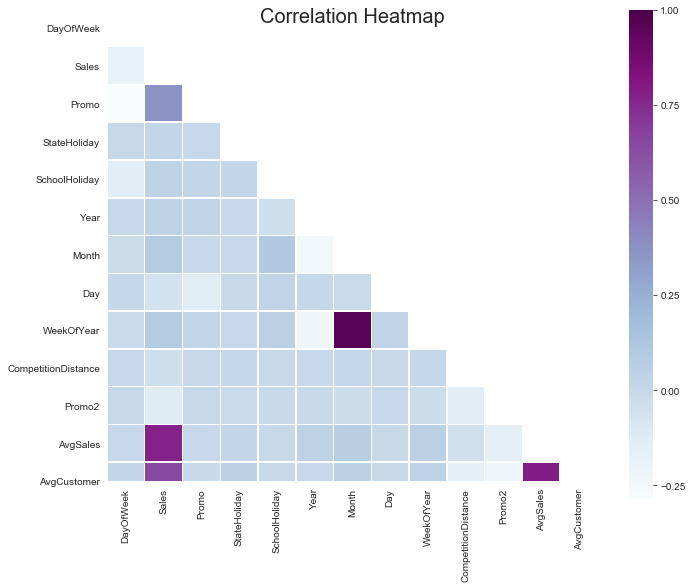

In [41]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

In [42]:
dfv = df.copy()

## 2. Sales Distribution

Text(0.5, 1.0, 'Sales Distribution')

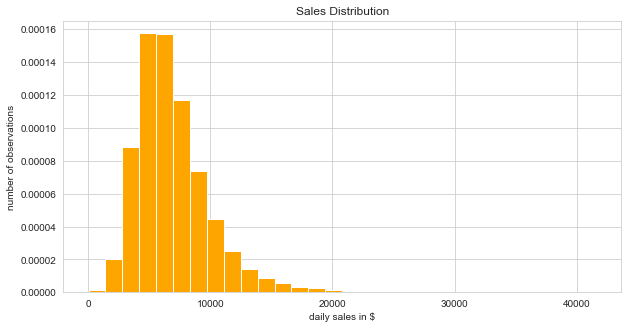

In [43]:
plt.figure(figsize=(10,5))
plt.hist(x=dfv.Sales,density = True , bins=30,color = "orange")
plt.ylabel('number of observations')
plt.xlabel('daily sales in $')
plt.title('Sales Distribution')

## 3. Customer Distribution

Text(0.5, 1.0, 'Customer Distribution')

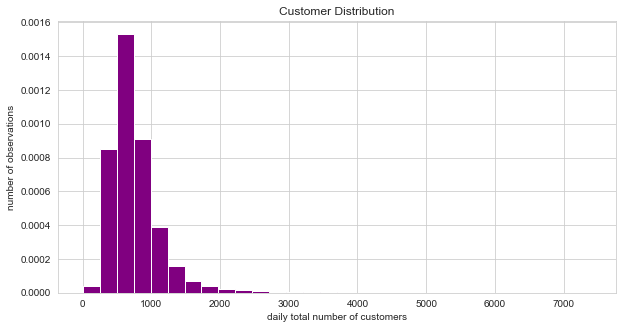

In [44]:
plt.figure(figsize=(10,5))
plt.hist(x=dfv.Customers,density = True , bins=30,color = "purple")
plt.ylabel('number of observations')
plt.xlabel('daily total number of customers')
plt.title('Customer Distribution')

# 4. Sales Over Time

In [45]:
store1_2015 = dfv.query('Store == 1 and Year == 2015')
store1_2013 = dfv.query('Store == 1 and Year == 2013')
store1_2014 = dfv.query('Store == 1 and Year == 2014')

Text(0.5, 1.0, 'Sales Over Time')

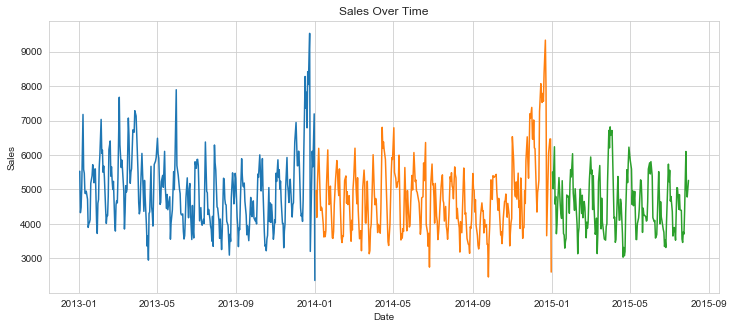

In [46]:
plt.figure(figsize=(12,5))
sns.lineplot(x=store1_2013.Date, y=store1_2013.Sales, data=store1_2013)
sns.lineplot(x=store1_2014.Date, y=store1_2014.Sales, data=store1_2014)
sns.lineplot(x=store1_2015.Date, y=store1_2015.Sales, data=store1_2015)
plt.title('Sales Over Time')

# 5. Sales Over Days of A Month

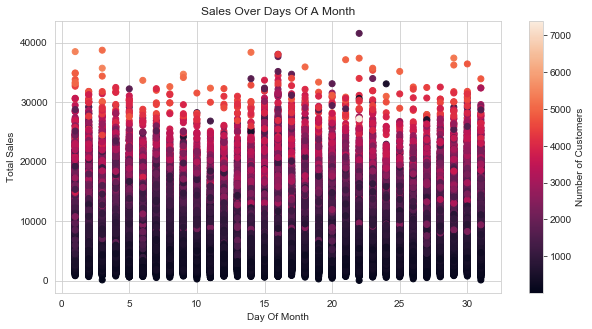

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(x=dfv.Day, y=dfv.Sales , c=dfv.Customers)
plt.ylabel('Total Sales')
plt.xlabel('Day Of Month')
plt.title('Sales Over Days Of A Month')
cbr= plt.colorbar()
cbr.set_label('Number of Customers')

## 6. Sales Over Weeks

Text(0.5, 1.0, 'Sales Over Days of a Week')

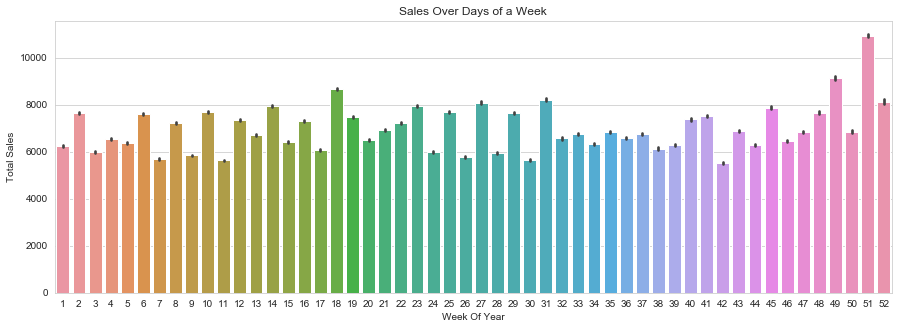

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x=dfv['WeekOfYear'],y=dfv['Sales'],data=dfv)
plt.xlabel('Week Of Year')
plt.ylabel('Total Sales')
plt.title('Sales Over Days of a Week')

Text(0.5, 1.0, 'Sales Over Days of a Week')

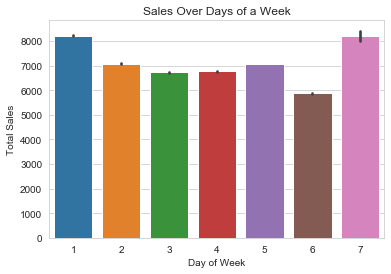

In [49]:
sns.barplot(x=dfv['DayOfWeek'],y=dfv['Sales'],data=dfv)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Sales Over Days of a Week')

## 7. Sales By Store Type

Text(0.5, 1.0, 'Sales By Store Type')

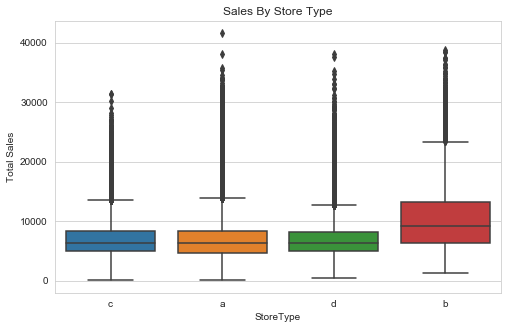

In [50]:
# StoreType - differentiates between 4 different store models: a, b, c, d
plt.figure(figsize=(8,5))
sns.boxplot(x=dfv.StoreType, y=dfv.Sales, data=dfv)
plt.ylabel('Total Sales')
plt.title('Sales By Store Type')

## 8. Sales By Assortment

Text(0.5, 1.0, 'Sales By Assortment')

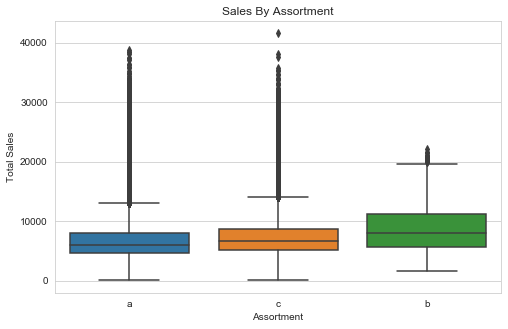

In [51]:
# Assortment - describes an assortment level: a = basic, b = extra, c = extended
plt.figure(figsize=(8,5))
sns.boxplot(x=dfv.Assortment, y=dfv.Sales, data=dfv)
plt.ylabel('Total Sales')
plt.title('Sales By Assortment')

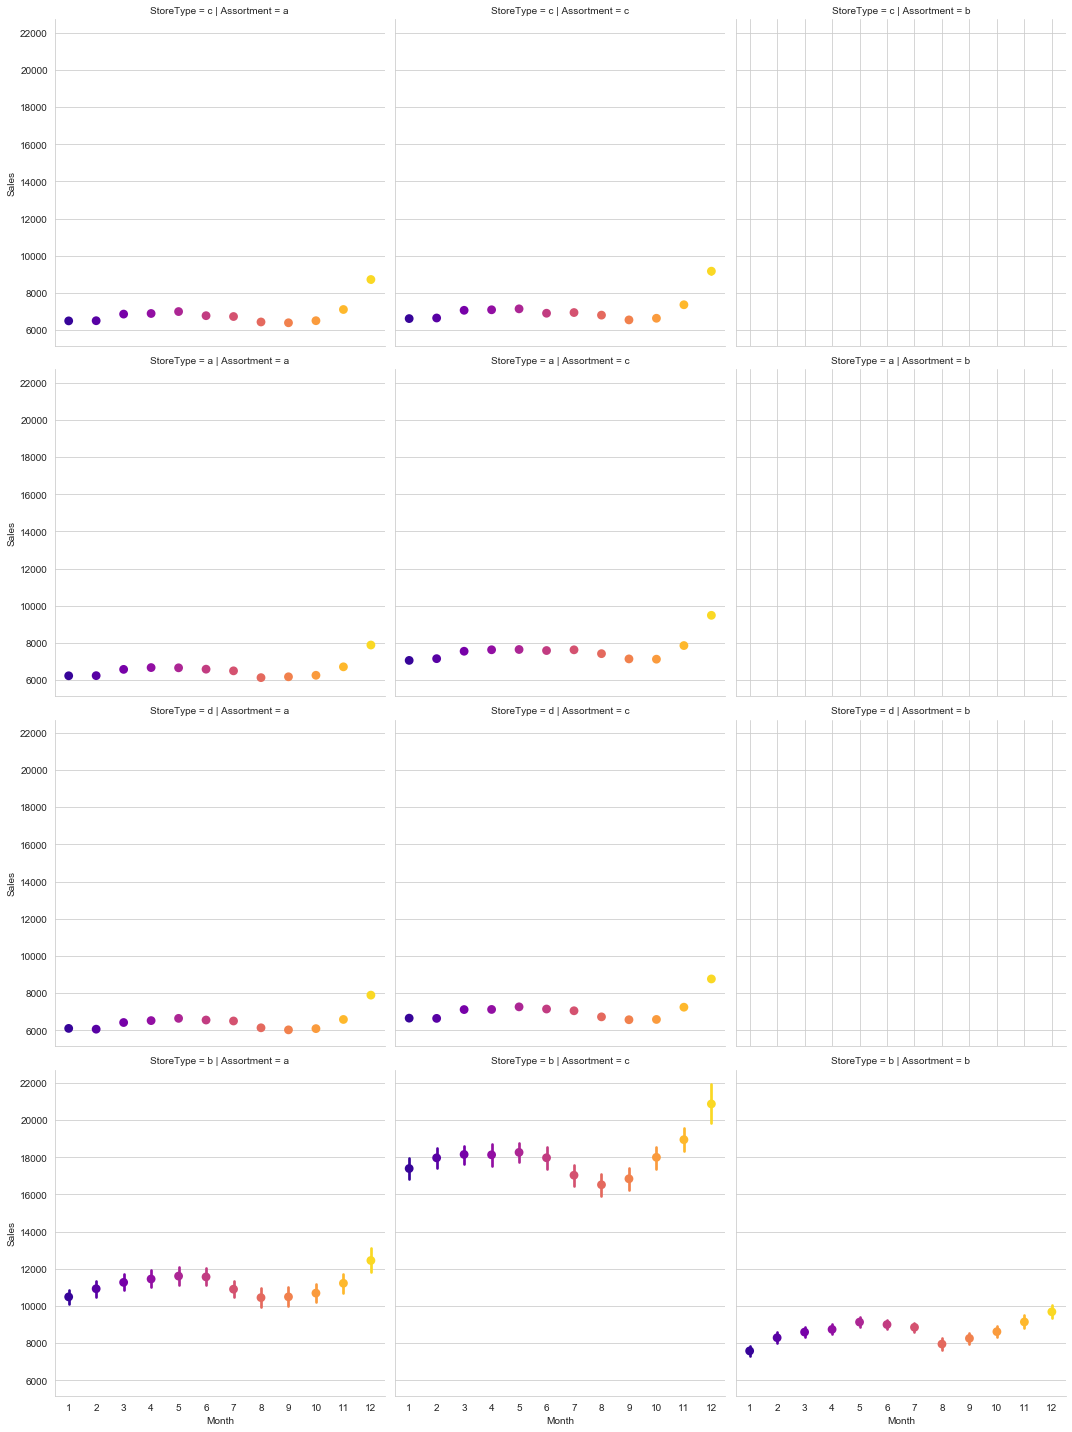

In [52]:
sns.factorplot(data = dfv, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               row = 'StoreType')

# 9. Sales Vs Number of Customers

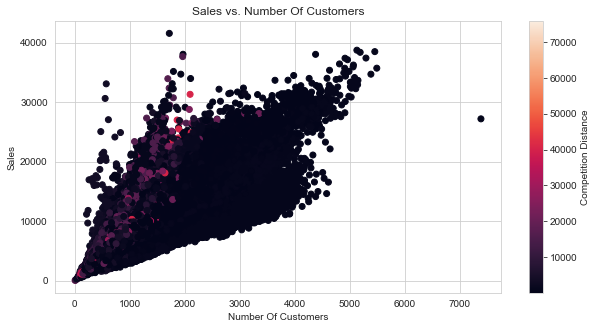

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(x=dfv.Customers, y=dfv.Sales , c=dfv.CompetitionDistance)
plt.ylabel('Sales')
plt.xlabel('Number Of Customers')
plt.title('Sales vs. Number Of Customers')
cbr= plt.colorbar()
cbr.set_label('Competition Distance')

# 10. Sales vs. Competition Distance

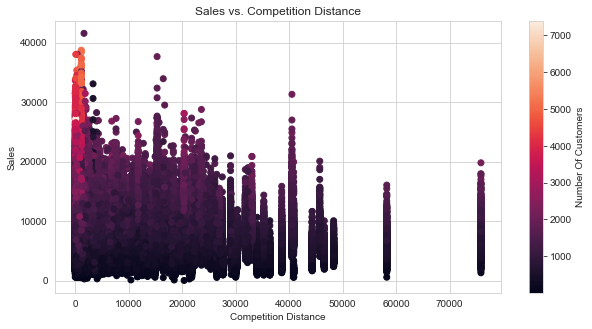

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(x=dfv.CompetitionDistance, y=dfv.Sales , c=dfv.Customers)
plt.ylabel('Sales')
plt.xlabel('Competition Distance')
plt.title('Sales vs. Competition Distance')
cbr= plt.colorbar()
cbr.set_label('Number Of Customers')

## 11. Sales By Promotion

Text(0.5, 1.0, 'Sales By Promotion')

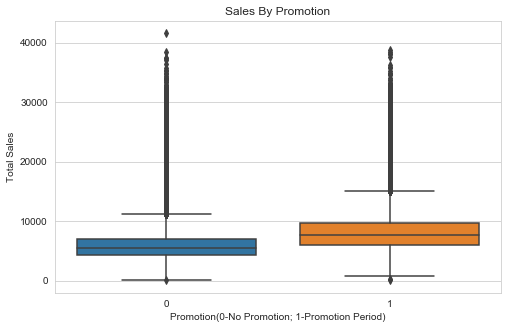

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x=dfv.Promo, y=dfv.Sales, data=dfv)
plt.ylabel('Total Sales')
plt.xlabel('Promotion(0-No Promotion; 1-Promotion Period)')
plt.title('Sales By Promotion')

In [56]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0, 0.5, 'Sales')

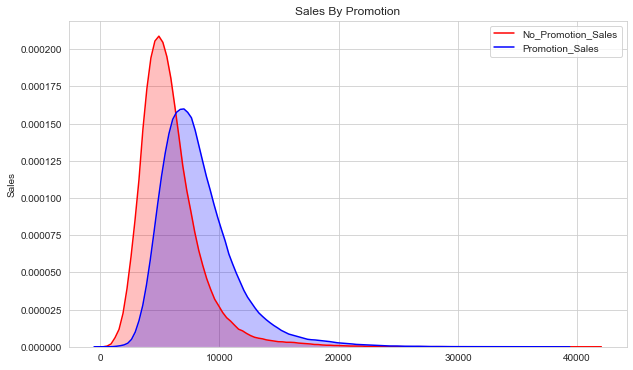

In [57]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

## Store Sales Prediction

In [41]:
# split features and labels
X = df1.drop('Sales', axis=1)
y = df1. Sales

In [42]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [43]:
# split training and test datasets
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [45]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

regression_train = linreg.score(xd_train, yd_train)
regression_test = linreg.score(xd_test, yd_test)

Regresion Model Score : 0.7486872962950808 , Out of Sample Test Score : 0.7482884273948014
Training RMSE : 1552.8927784361235 Testing RMSE : 1556.03272570329
Training MAPE : 16.996208120523935 Testing MAPE : 17.053657649223258


## Random Forest Regression

In [46]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [47]:
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)


In [49]:
#There are multiple features present in the dataset
#This DataFrame will help us to obtain the importance of each features.

feature_importances = pd.DataFrame(rdf.feature_importances_,
                                   index = xl_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [50]:
feature_importances

,importance
AvgSales,0.629155
Promo,0.141961
DayOfWeek,0.050566
AvgCustomer,0.039632
Day,0.037668
CompetitionDistance,0.036385
WeekOfYear,0.024822
StoreType,0.011076
Month,0.009787
Assortment,0.005964


In [51]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Forest_train = rdfreg.score(xl_train, yl_train)
Forest_test = rdfreg.score(xl_test, yl_test)

Regresion Model Score : 0.9878636813821435 , Out of Sample Test Score : 0.9192983999113792
Training RMSE : 341.25398681433654 Testing RMSE : 881.0655245593666
Training MAPE : 3.415174311681451 Testing MAPE : 9.027843889975701


# KNN Regression

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Knn_train = knnreg.score(xd_train, yd_train)
Knn_test =  knnreg.score(xd_test, yd_test)

Regresion Model Score : 0.6514919969772337 , Out of Sample Test Score : 0.6277013414400041


In [72]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))
    
    

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.6713355460740096
Regresion Model Score : 0.9174382077256099 , Out of Sample Test Score : 0.7028982767164882
Regresion Model Score : 0.8674079040730914 , Out of Sample Test Score : 0.6882273118515285
Regresion Model Score : 0.8237553183676828 , Out of Sample Test Score : 0.6622603886847955
Regresion Model Score : 0.7831555142797049 , Out of Sample Test Score : 0.6380455436468406
Regresion Model Score : 0.7479327384709074 , Out of Sample Test Score : 0.6209075764677412
Regresion Model Score : 0.7207553684123154 , Out of Sample Test Score : 0.609514759500425
Regresion Model Score : 0.7003407202710207 , Out of Sample Test Score : 0.6021167949934485
Regresion Model Score : 0.684490153400208 , Out of Sample Test Score : 0.5973257493711543
Regresion Model Score : 0.6729819312035159 , Out of Sample Test Score : 0.5957241805089737
Regresion Model Score : 0.6653044886979489 , Out of Sample Test Score : 0.5970751625091903
Regresion Model 

# Comparison between Models

In [73]:
#Accuracy Score Comparison between Linear Regression, Random Forest and KNN

import pandas as pd

train_error=[regression_train,Forest_train,Knn_train]

test_error=[regression_test,Forest_test,Knn_test]

col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression','RDF','Knn']
dfm=pd.DataFrame(data=col,index=models)
dfm

,Train Error,Test Error
Linear Regression,0.748687,0.748288
RDF,0.987805,0.919520
Knn,0.651492,0.627701


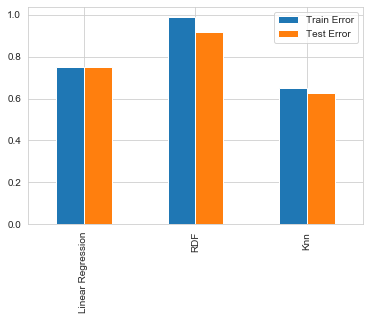

In [74]:
#PLotting the table using Bar Plot
dfm.plot(kind='bar')